In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## PCA Implementation

In [2]:
def pca_imp(file_name):
    # Reading a csv file
    file = pd.read_csv(file_name, sep='\t',header=None)

    # Drop a Target column
    target = file.iloc[:,-1]
    inputs = file.drop(file.columns[-1], axis =1)
    inputs_copy = inputs.copy()
    
    # Convert dataframe to numpy matrix
    inputs_matrix = inputs.to_numpy()
    
    # Calculating Mean for every column
    mean_matrix = np.mean(inputs_matrix, axis = 0)
    
    # Mean Centered Matrix calculation
    inputs_matrix = inputs_matrix - mean_matrix
    
    transpose_matrix = np.transpose(inputs_matrix) # Finding a transpose of a matrix 
    
    # Eigen value and vector calculation
    cov_matrix = np.cov(transpose_matrix)  
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    eigen_vectors = np.real_if_close(eigen_vectors, tol=1)
    
    # Selecting 2 eigen vectors corresponding to top 2 eigen values and calculating final principal components
    principal_weights = eigen_vectors[:, 0:2]
    final_dimensions = np.matmul(inputs_matrix, principal_weights)
    
    # Merging the principal components with the target variable
    final_df = pd.DataFrame(final_dimensions)
    final_df['Target'] = target
    final_df.rename(columns={0:'PCA1', 1:'PCA2'}, inplace = True)
    
    # Plotting the scatter plot 
    labels = set(final_df['Target'])
    plt.figure(figsize = (12,12))
    for label in labels:
        index = final_df['Target'] == label
        plt.plot(final_df['PCA1'][index], final_df['PCA2'][index],linestyle='none', marker='o', label=label)
        plt.xlabel('PCA_1', fontsize=18)
        plt.ylabel('PCA_2', fontsize=18)
    plt.legend(numpoints=1, fontsize=18)
    plt.title("PCA Implementation for "+file_name.split('.')[0], fontsize=18)
    plt.savefig("PCA_Implementation")
    plt.show()

## SVD Algorithm

In [3]:
# SVD Algorithm
def svd(file_name):
    
    # Read the file to data frame and drop the last column
    file = pd.read_csv(file_name, sep='\t',header=None)
    target = file.iloc[:,-1]
    inputs_copy = file.drop(file.columns[-1], axis =1)
    
    # Calculate the decomposed matrices 
    p,d,q = np.linalg.svd(inputs_copy.to_numpy())
    svd_matrix = p[:,:2]
    svd_df = pd.DataFrame(svd_matrix)
    svd_df.rename(columns = {0:'SVD1',1:'SVD2'}, inplace = True)
    svd_df['Target'] = target 

    # Plotting the scatter plot for SVD
    labels = set(svd_df['Target'])
    plt.figure(figsize = (12,12))
    for label in labels:
        index = svd_df['Target'] == label
        plt.plot(svd_df['SVD1'][index], svd_df['SVD2'][index],linestyle='none', marker='o', label=label)
        plt.xlabel('SVD_1', fontsize=18)
        plt.ylabel('SVD_2', fontsize=18)
    plt.legend(numpoints=1, fontsize=18)
    plt.title("SVD Algorithm for "+file_name.split('.')[0], fontsize=18)
    plt.savefig("SVD_Algorithm")
    plt.show()

## t-SNE Algorithm

In [4]:
def tsne(file_name):    
    file = pd.read_csv(file_name, sep='\t',header=None)
    target = file.iloc[:,-1]
    inputs_copy = file.drop(file.columns[-1], axis =1)
    X_embedded = TSNE(n_components=2).fit_transform(inputs_copy.to_numpy())
    tSNE_df = pd.DataFrame(X_embedded)
    tSNE_df.rename(columns = {0:'tSNE_1',1:'tSNE_2'}, inplace = True)
    tSNE_df["Target"] = target
    
    # Plotting the scatter plot for t-SNE
    labels = set(tSNE_df['Target'])
    plt.figure(figsize = (12,12))
    for label in labels:
        index = tSNE_df['Target'] == label
        plt.plot(tSNE_df['tSNE_1'][index], tSNE_df['tSNE_2'][index],linestyle='none', marker='o', label=label)
        plt.xlabel('tSNE_1', fontsize=18)
        plt.ylabel('tSNE_2', fontsize=18)
    plt.legend(numpoints=1, fontsize=18)
    plt.title("t-SNE Algorithm for "+file_name.split('.')[0], fontsize=18)
    plt.savefig("t-SNE_Algorithm")
    plt.show()

---
### Results for "pca_a.txt"
---

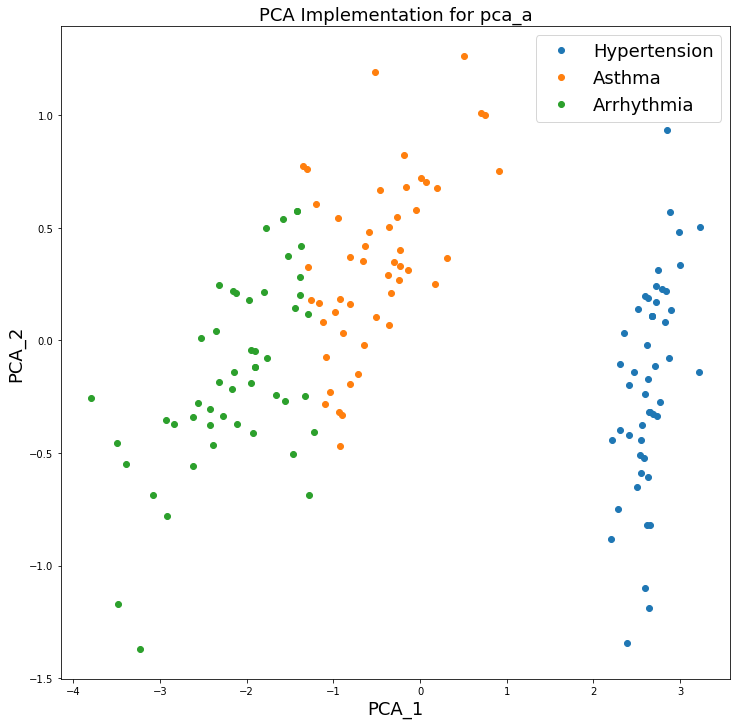

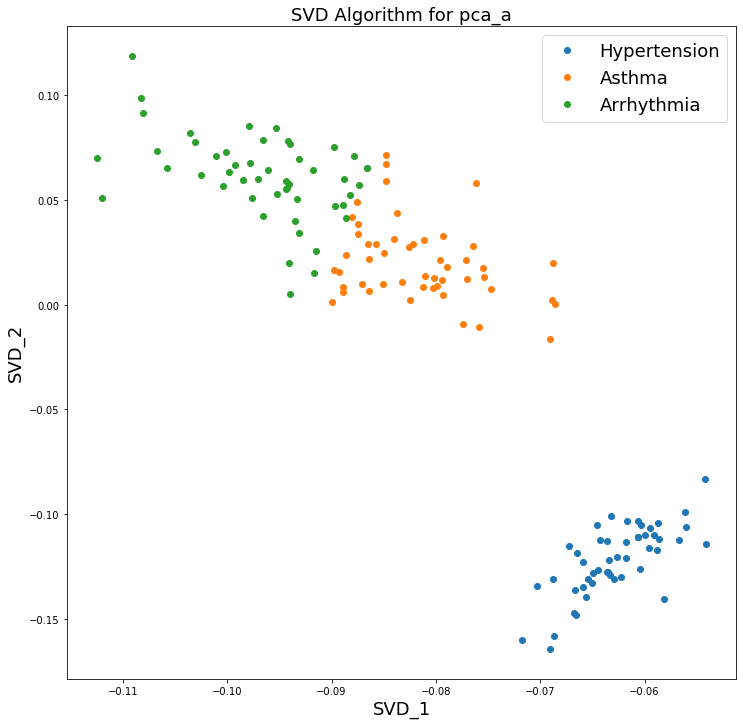

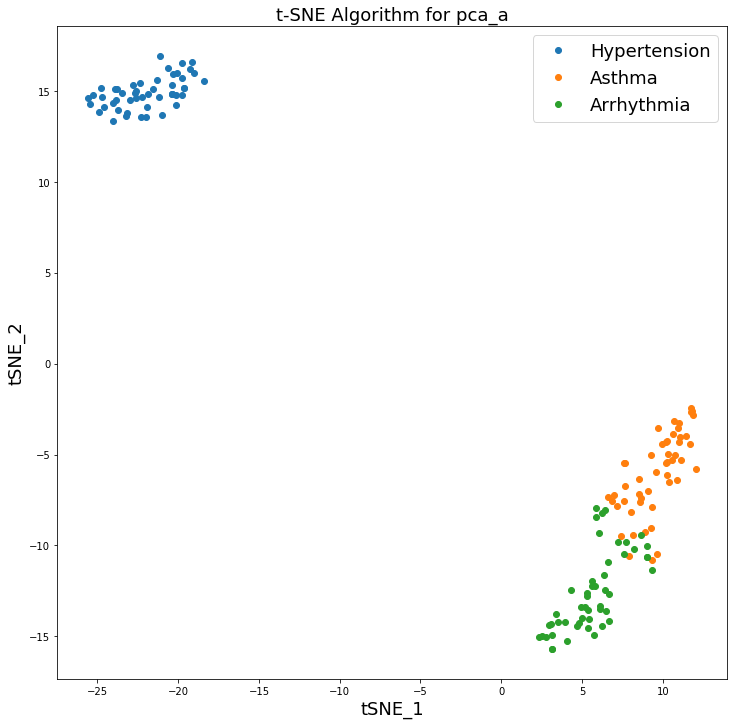

In [5]:
pca_imp('pca_a.txt')
print("\n")
svd("pca_a.txt")
print("\n")
tsne("pca_a.txt")

---
### Results for "pca_b.txt"
---

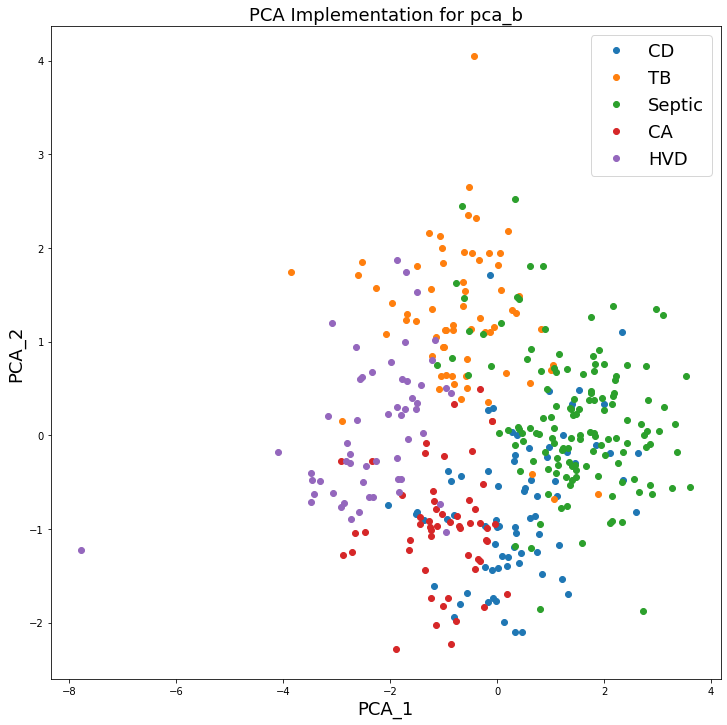

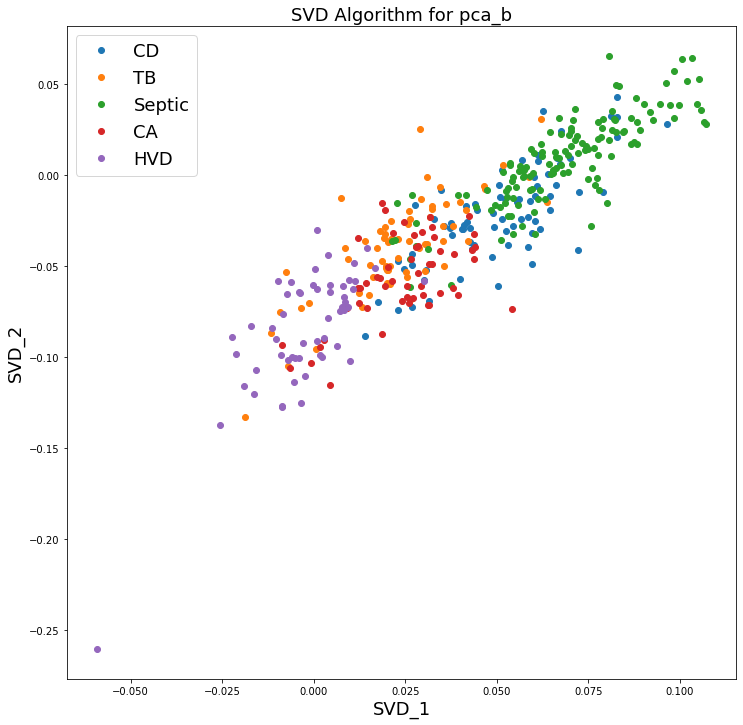

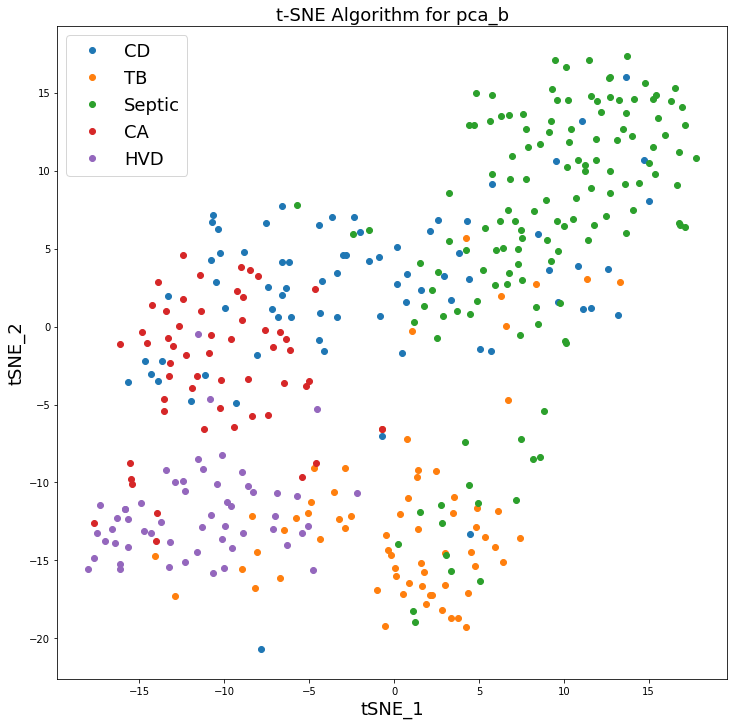

In [6]:
pca_imp('pca_b.txt')
print("\n")
svd("pca_b.txt")
print("\n")
tsne("pca_b.txt")

---
### Results for "pca_c.txt"
---

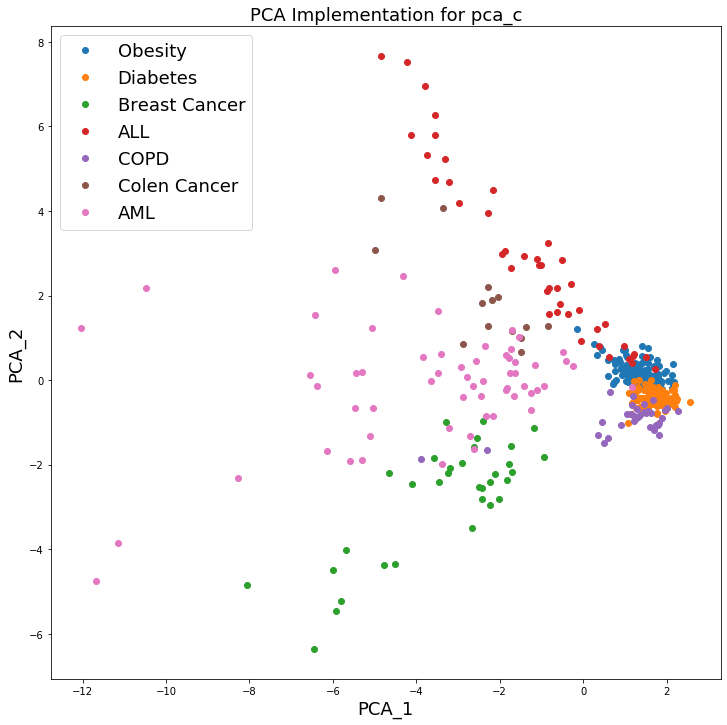

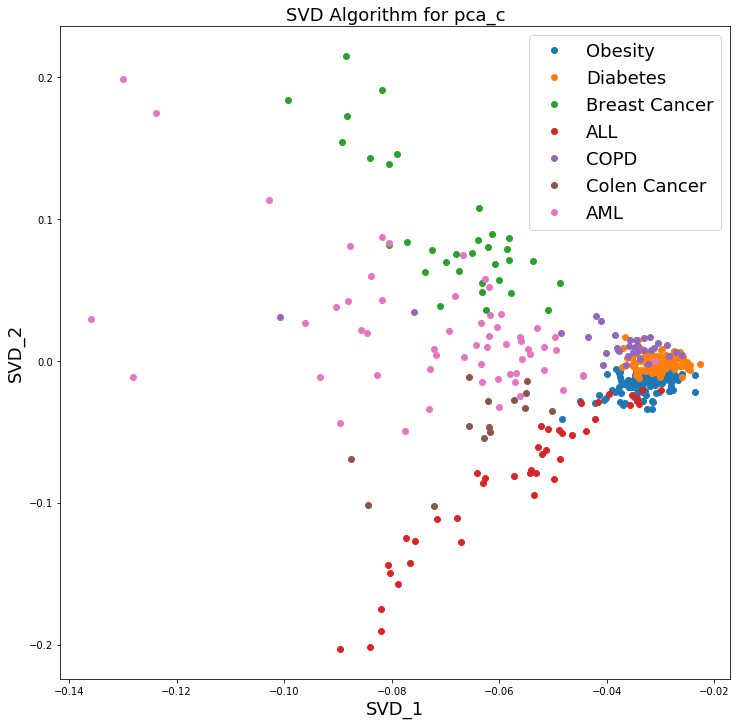

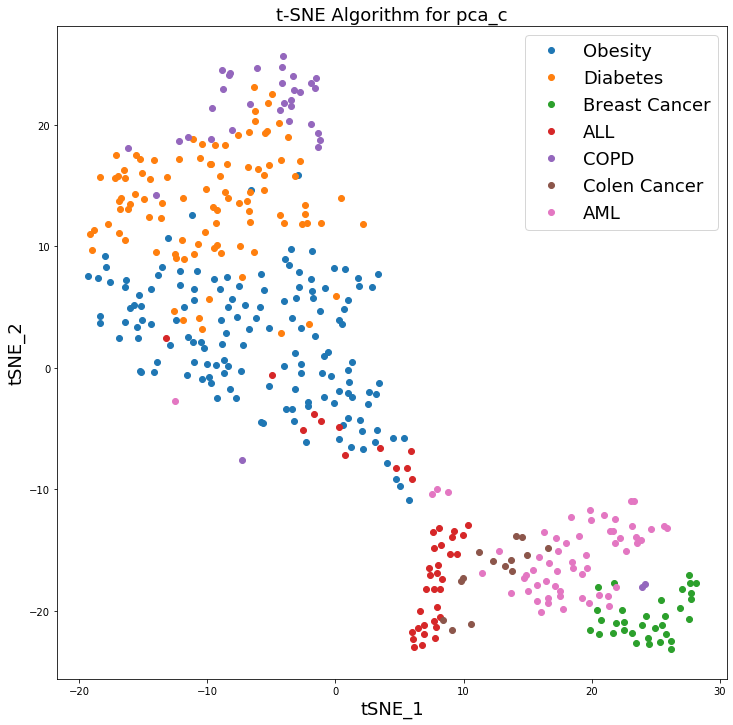

In [7]:
pca_imp('pca_c.txt')
print("\n")
svd("pca_c.txt")
print("\n")
tsne("pca_c.txt")

### Demo

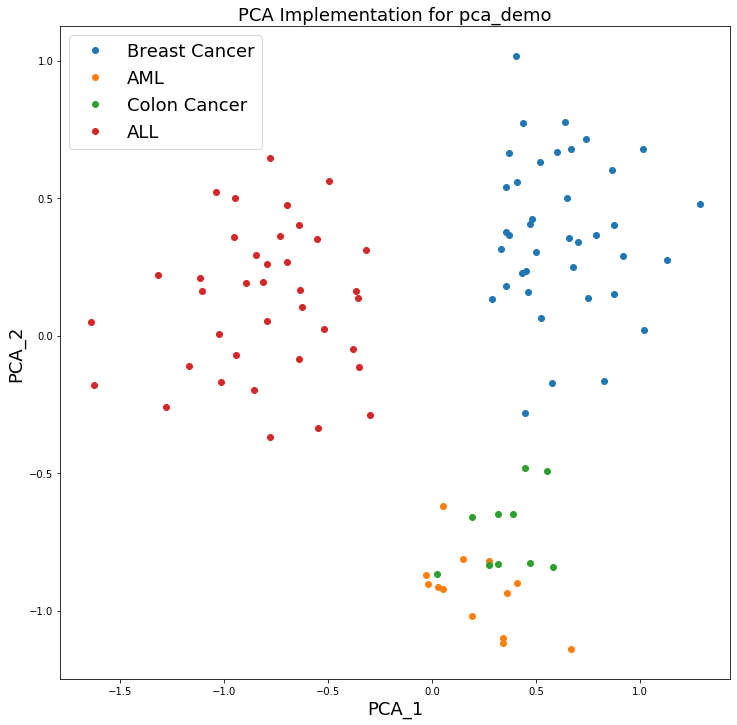

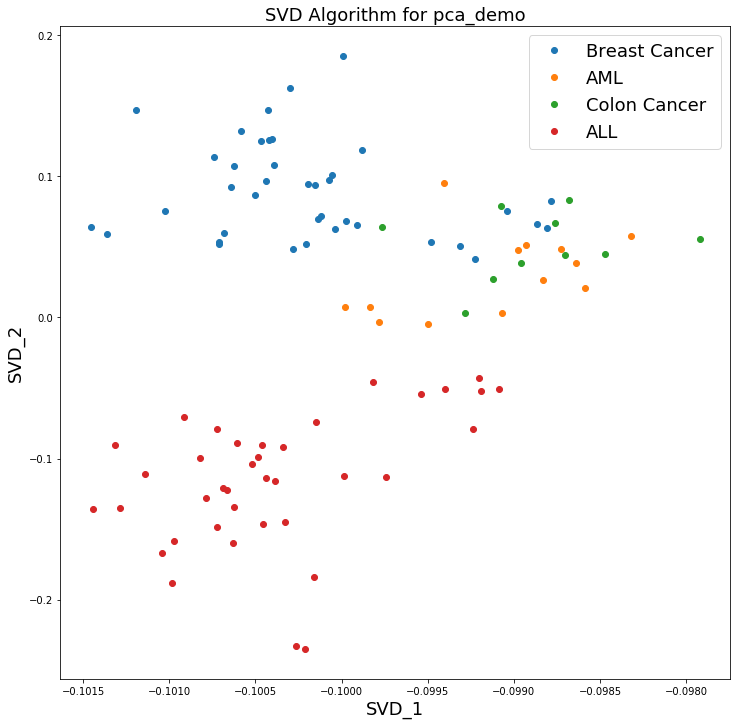

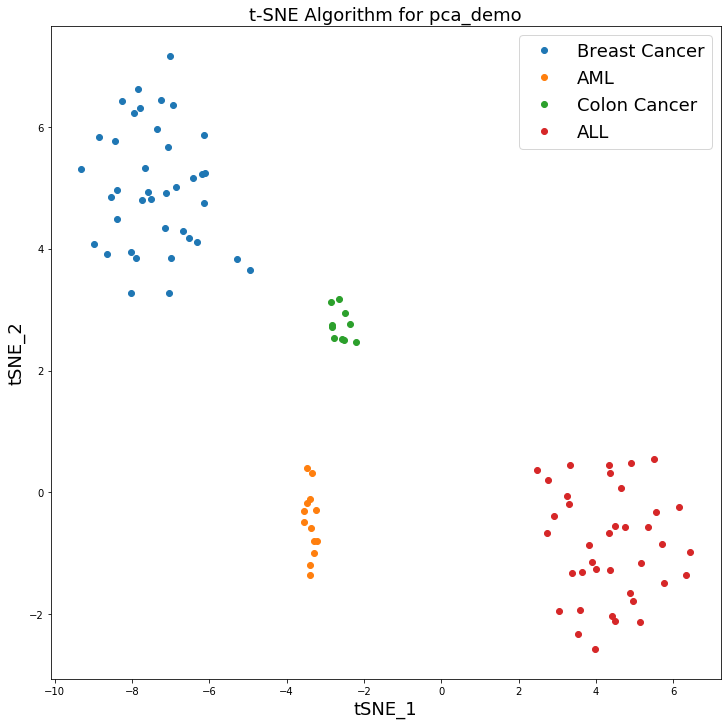

In [8]:
filename = "pca_demo.txt"
pca_imp(filename)
print("\n")
svd(filename)
print("\n")
tsne(filename)